<a href="https://colab.research.google.com/github/apriyaldilukman/-learn-react-hooks/blob/master/Emotion_Classification_by_Face_using_CNN_and_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Klasifikasi Emosi Menggunakan CNN Arsitektur Xception ✅**

---

Xception adalah arsitektur jaringan saraf convolutional yang diusulkan oleh François Chollet, yang juga menciptakan Keras. Xception merupakan singkatan dari "Extreme Inception" dan merupakan pengembangan dari arsitektur Inception yang terkenal, namun dengan beberapa modifikasi signifikan.

![Xception](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*VvBTMkVRus6bWOqrK1SlLQ.png)

![Arsitektur Xception](https://maelfabien.github.io/assets/images/xception.jpg)

Berikut adalah beberapa aspek penting dari arsitektur Xception:

**1. Separable Convolutions:**

Xception menggunakan depthwise separable convolutions sebagai pengganti convolutions tradisional. Depthwise separable convolution terdiri dari dua langkah:

  *   **Depthwise Convolution**: Melakukan convolution terpisah pada setiap channel input.
  *   **Pointwise Convolution**: Menggunakan convolution 1x1 untuk menggabungkan hasil depthwise convolution.

Pendekatan ini mengurangi jumlah parameter dan komputasi tanpa mengurangi kinerja model secara signifikan.

**2. Modular Architecture:**

Xception terdiri dari modul-modul yang disebut sebagai entry flow, middle flow, dan exit flow.

  *   **Entry Flow**: Melakukan beberapa convolution dan pooling awal untuk mengurangi resolusi dan mengekstraksi fitur dasar.
  *   **Middle Flow**: Bagian utama dari arsitektur yang mengandung sejumlah blok residual yang menggunakan depthwise separable convolutions.
  *   **Exit Flow**: Mengambil fitur yang telah diekstraksi dan mengolahnya lebih lanjut untuk menghasilkan output akhir.

**3. Residual Connections:**

Xception menggunakan residual connections, yang pertama kali diperkenalkan dalam arsitektur ResNet, untuk membantu mengatasi masalah degradasi saat jaringan semakin dalam. Residual connections memungkinkan aliran gradien yang lebih baik melalui jaringan selama pelatihan.

**4. Efficiency and Performance:**

Dengan menggantikan convolutions tradisional dengan depthwise separable convolutions, Xception mencapai efisiensi yang lebih tinggi dalam hal komputasi dan parameter, sambil tetap mempertahankan atau bahkan meningkatkan kinerja dalam tugas-tugas klasifikasi gambar.

Arsitektur Xception telah terbukti efektif dalam berbagai tugas pengenalan gambar dan sering digunakan sebagai dasar dalam berbagai aplikasi computer vision.

## **Pembahasan Mengenai Proses atau Metode Penelitian**


---



Penelitian ini bertujuan untuk mengklasifikasikan jenis emosi yang terdiri dari 7 emosi yakni:


*   Bahagia 😄
*   Sedih 😟
*   Marah 😠
*   Netral 😐
*   Takut 😨
*   Jijik 🤢
*   Terkejut 😱

Berdasarkan citra (gambar) yang diinputkan yakni berupa gambar ekspresi wajah yang mewakili masing - masing dari 7 emosi yang telah disebutkan

In [12]:
!pip install split-folders

## **1. Mengambil Data dari Goole Drive**


 ### **1.1 Mounting Google Drive**




In [13]:
from google.colab import drive
import os

# mounting gdrive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [14]:
# import os

# # Cek isi folder Dataset Gabungan
# source_folder = 'gdrive/MyDrive/Data Penelitian/AffectNet'

# import os
# import shutil
# import random


# # Path folder tujuan
# destination_folder = 'gdrive/MyDrive/Data Penelitian/AffecNet'

# # Buat folder tujuan jika belum ada
# if not os.path.exists(destination_folder):
#     os.makedirs(destination_folder)

# # Definisikan daftar nama folder kelas
# classes = ['Bahagia', 'Jijik', 'Marah', 'Netral', 'Sedih', 'Takut', 'Terkejut']

# # Iterasi melalui setiap kelas
# for class_name in classes:
#     # Path folder asal kelas
#     class_source = os.path.join(source_folder, class_name)

#     # Path folder tujuan kelas
#     class_destination = os.path.join(destination_folder, class_name)

#     # Buat folder tujuan untuk kelas ini jika belum ada
#     if not os.path.exists(class_destination):
#         os.makedirs(class_destination)

#     # Ambil daftar semua file gambar dalam folder kelas
#     all_images = os.listdir(class_source)

#     # Filter file yang merupakan gambar (opsional, jika ada file non-gambar)
#     all_images = [img for img in all_images if img.endswith(('.jpg', '.jpeg', '.png'))]

#     # Pilih 200 gambar secara acak (atau lebih sedikit jika jumlah gambar kurang dari 200)
#     selected_images = random.sample(all_images, min(200, len(all_images)))

#     # Salin gambar-gambar yang dipilih ke folder tujuan
#     for image in selected_images:
#         src_image_path = os.path.join(class_source, image)
#         dst_image_path = os.path.join(class_destination, image)
#         shutil.copy(src_image_path, dst_image_path)

#     print(f"{len(selected_images)} gambar telah disalin dari kelas {class_name}")

In [15]:
# # Verifikasi jumlah gambar di folder tujuan
# for class_name in classes:
#     class_destination = os.path.join(destination_folder, class_name)
#     num_files = len(os.listdir(class_destination))
#     print(f"Jumlah gambar di kelas {class_name}: {num_files}")


 ### **1.2 Melakukan Split Dataset Menggunakan Split-Folders**




 #### **Dataset Gabungan**

In [16]:
import splitfolders

# Path ke dataset asli
input_folder = 'gdrive/My Drive/Data Penelitian/AffectNet/'

# Path untuk menyimpan dataset yang sudah di-split
output_folder = 'gdrive/My Drive/Data Penelitian/AffectNet - Splitted/'

# Membuat folder output jika belum ada
os.makedirs(output_folder, exist_ok=True)

# Mengecek apakah folder output sudah berisi data yang di-split
if not os.listdir(output_folder):
    print("Folder kosong, mulai proses split...")
    splitfolders.ratio(input_folder, output=output_folder,
                       seed=42, ratio=(.7, .2, .1),
                       group_prefix=None, move=False)
    print("Proses split selesai.")
else:
    print("Data sudah di-split, melewatkan proses split.")

Data sudah di-split, melewatkan proses split.


In [17]:
# Struktur Direktori Folder

# /content/drive/MyDrive/Data Penelitian
# └── Data Penelitian/
#     └── Dataset Gabungan/
#         ├── Bahagia/
#         ├── Jijik/
#         ............
#     └── Dataset Gabungan - Splitted/
#         ├── train/
#             ├── Bahagia/
#             ├── Jijik/
#             ............
#         ├── val/
#             ├── Bahagia/
#             ├── Jijik/
#             ............
#         ├── test/
#             ├── Bahagia/
#             ├── Jijik/
#             ............

 ### **1.3 Mendefinisikan Path (Jalur) Dataset**




In [18]:
# mengambil foolder root tempat menyimpan dataset
ROOT_PATH = 'gdrive/My Drive/Data Penelitian/'

# mengambil dataset untuk proses klasifikasi
DATASET = os.path.join(ROOT_PATH, 'Splitted')

# mengambil folder data_train, data_val, dan data_test
DATA_TRAIN = os.path.join(DATASET, 'train')
DATA_VAL = os.path.join(DATASET, 'val')
DATA_TEST = os.path.join(DATASET, 'test')

# opsional - tampilkan info lokasi dataset
print("Data Train Path      :", DATA_TRAIN)
print("Data Validation Path :", DATA_VAL)
print("Data Test Path       :", DATA_TEST)

Data Train Path      : gdrive/My Drive/Data Penelitian/Splitted/train
Data Validation Path : gdrive/My Drive/Data Penelitian/Splitted/val
Data Test Path       : gdrive/My Drive/Data Penelitian/Splitted/test


## **2. Melihat Sebaran Data**

 ### **2.1 Melihat Perbandingan Antara Data Train, Validation, dan Test**

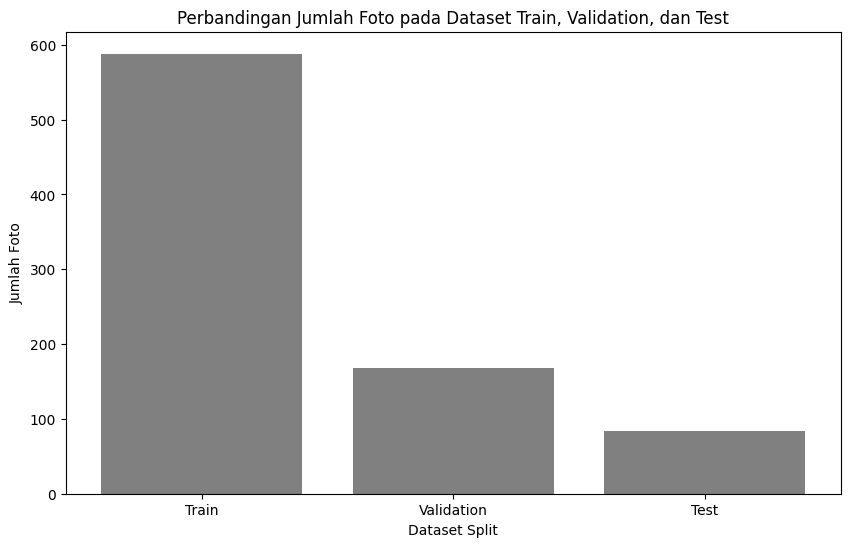

Jumlah foto di folder 'Train': 588 foto
Jumlah foto di folder 'Validation': 168 foto
Jumlah foto di folder 'Test': 84 foto

Total foto yang ada di ketiga folder adalah: 840 foto


In [19]:
import matplotlib.pyplot as plt

# Fungsi untuk menghitung jumlah gambar dalam folder kelas
def count_images_in_class_folder(folder_path):
    total_images = 0
    for class_folder in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_folder)
        if os.path.isdir(class_path):
            num_images = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
            total_images += num_images
    return total_images

# Hitung jumlah gambar di masing-masing folder dataset
num_train = count_images_in_class_folder(DATA_TRAIN)
num_val = count_images_in_class_folder(DATA_VAL)
num_test = count_images_in_class_folder(DATA_TEST)

# Data untuk bar chart
folders = ['Train', 'Validation', 'Test']
data_counts = [num_train, num_val, num_test]

# Buat bar chart
plt.figure(figsize=(10, 6))
plt.bar(folders, data_counts, color=['grey', 'grey', 'grey'])
plt.xlabel('Dataset Split')
plt.ylabel('Jumlah Foto')
plt.title('Perbandingan Jumlah Foto pada Dataset Train, Validation, dan Test')
plt.show()

# Cetak hasil jumlah foto di setiap folder
print(f"Jumlah foto di folder 'Train': {num_train} foto")
print(f"Jumlah foto di folder 'Validation': {num_val} foto")
print(f"Jumlah foto di folder 'Test': {num_test} foto")
print(f"\nTotal foto yang ada di ketiga folder adalah: {num_train + num_val + num_test} foto")

 ### **2.2 Melihat Sebaran Data Setiap Kelas Antara Data Train, Validation, dan Test**

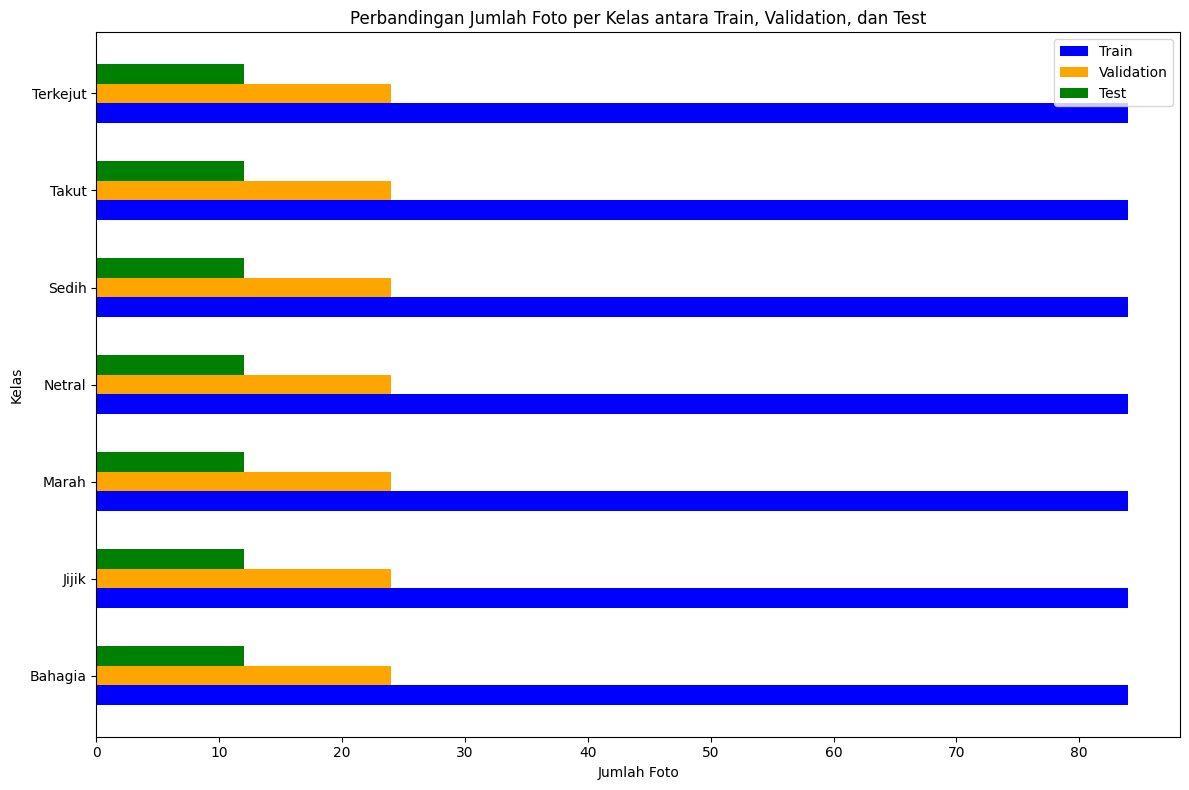

Jumlah foto per kelas:
Kelas 'Bahagia':
  Train: 84 foto
  Validation: 24 foto
  Test: 12 foto
Kelas 'Jijik':
  Train: 84 foto
  Validation: 24 foto
  Test: 12 foto
Kelas 'Marah':
  Train: 84 foto
  Validation: 24 foto
  Test: 12 foto
Kelas 'Netral':
  Train: 84 foto
  Validation: 24 foto
  Test: 12 foto
Kelas 'Sedih':
  Train: 84 foto
  Validation: 24 foto
  Test: 12 foto
Kelas 'Takut':
  Train: 84 foto
  Validation: 24 foto
  Test: 12 foto
Kelas 'Terkejut':
  Train: 84 foto
  Validation: 24 foto
  Test: 12 foto

Total foto di Train: 588
Total foto di Validation: 168
Total foto di Test: 84


In [20]:
# Fungsi untuk menghitung jumlah foto per kelas dalam folder dataset
def count_images_per_class(folder_path):
    class_counts = {}
    for class_name in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_name)
        if os.path.isdir(class_path):
            num_images = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
            class_counts[class_name] = num_images
    return class_counts

# Hitung jumlah foto per kelas di masing-masing folder dataset
train_counts = count_images_per_class(DATA_TRAIN)
val_counts = count_images_per_class(DATA_VAL)
test_counts = count_images_per_class(DATA_TEST)

# Dapatkan daftar semua kelas
all_classes = sorted(set(train_counts.keys()).union(val_counts.keys()).union(test_counts.keys()))

# Buat data untuk bar chart
train_data = [train_counts.get(cls, 0) for cls in all_classes]
val_data = [val_counts.get(cls, 0) for cls in all_classes]
test_data = [test_counts.get(cls, 0) for cls in all_classes]

# Buat bar chart horizontal
x = range(len(all_classes))
plt.figure(figsize=(12, 8))
plt.barh(x, train_data, height=0.2, label='Train', color='blue', align='center')
plt.barh([i + 0.2 for i in x], val_data, height=0.2, label='Validation', color='orange', align='center')
plt.barh([i + 0.4 for i in x], test_data, height=0.2, label='Test', color='green', align='center')

plt.ylabel('Kelas')
plt.xlabel('Jumlah Foto')
plt.title('Perbandingan Jumlah Foto per Kelas antara Train, Validation, dan Test')
plt.yticks([i + 0.2 for i in x], all_classes)
plt.legend()
plt.tight_layout()
plt.show()

# Cetak hasil jumlah foto di setiap folder
print("Jumlah foto per kelas:")
for cls in all_classes:
    print(f"Kelas '{cls}':")
    print(f"  Train: {train_counts.get(cls, 0)} foto")
    print(f"  Validation: {val_counts.get(cls, 0)} foto")
    print(f"  Test: {test_counts.get(cls, 0)} foto")

total_train = sum(train_data)
total_val = sum(val_data)
total_test = sum(test_data)

print(f"\nTotal foto di Train: {total_train}")
print(f"Total foto di Validation: {total_val}")
print(f"Total foto di Test: {total_test}")

## **3. Contoh Data Yang Digunakan**

 ### **3.1 Menampilkan 25 Contoh Data (Radom Sample) Data Train**

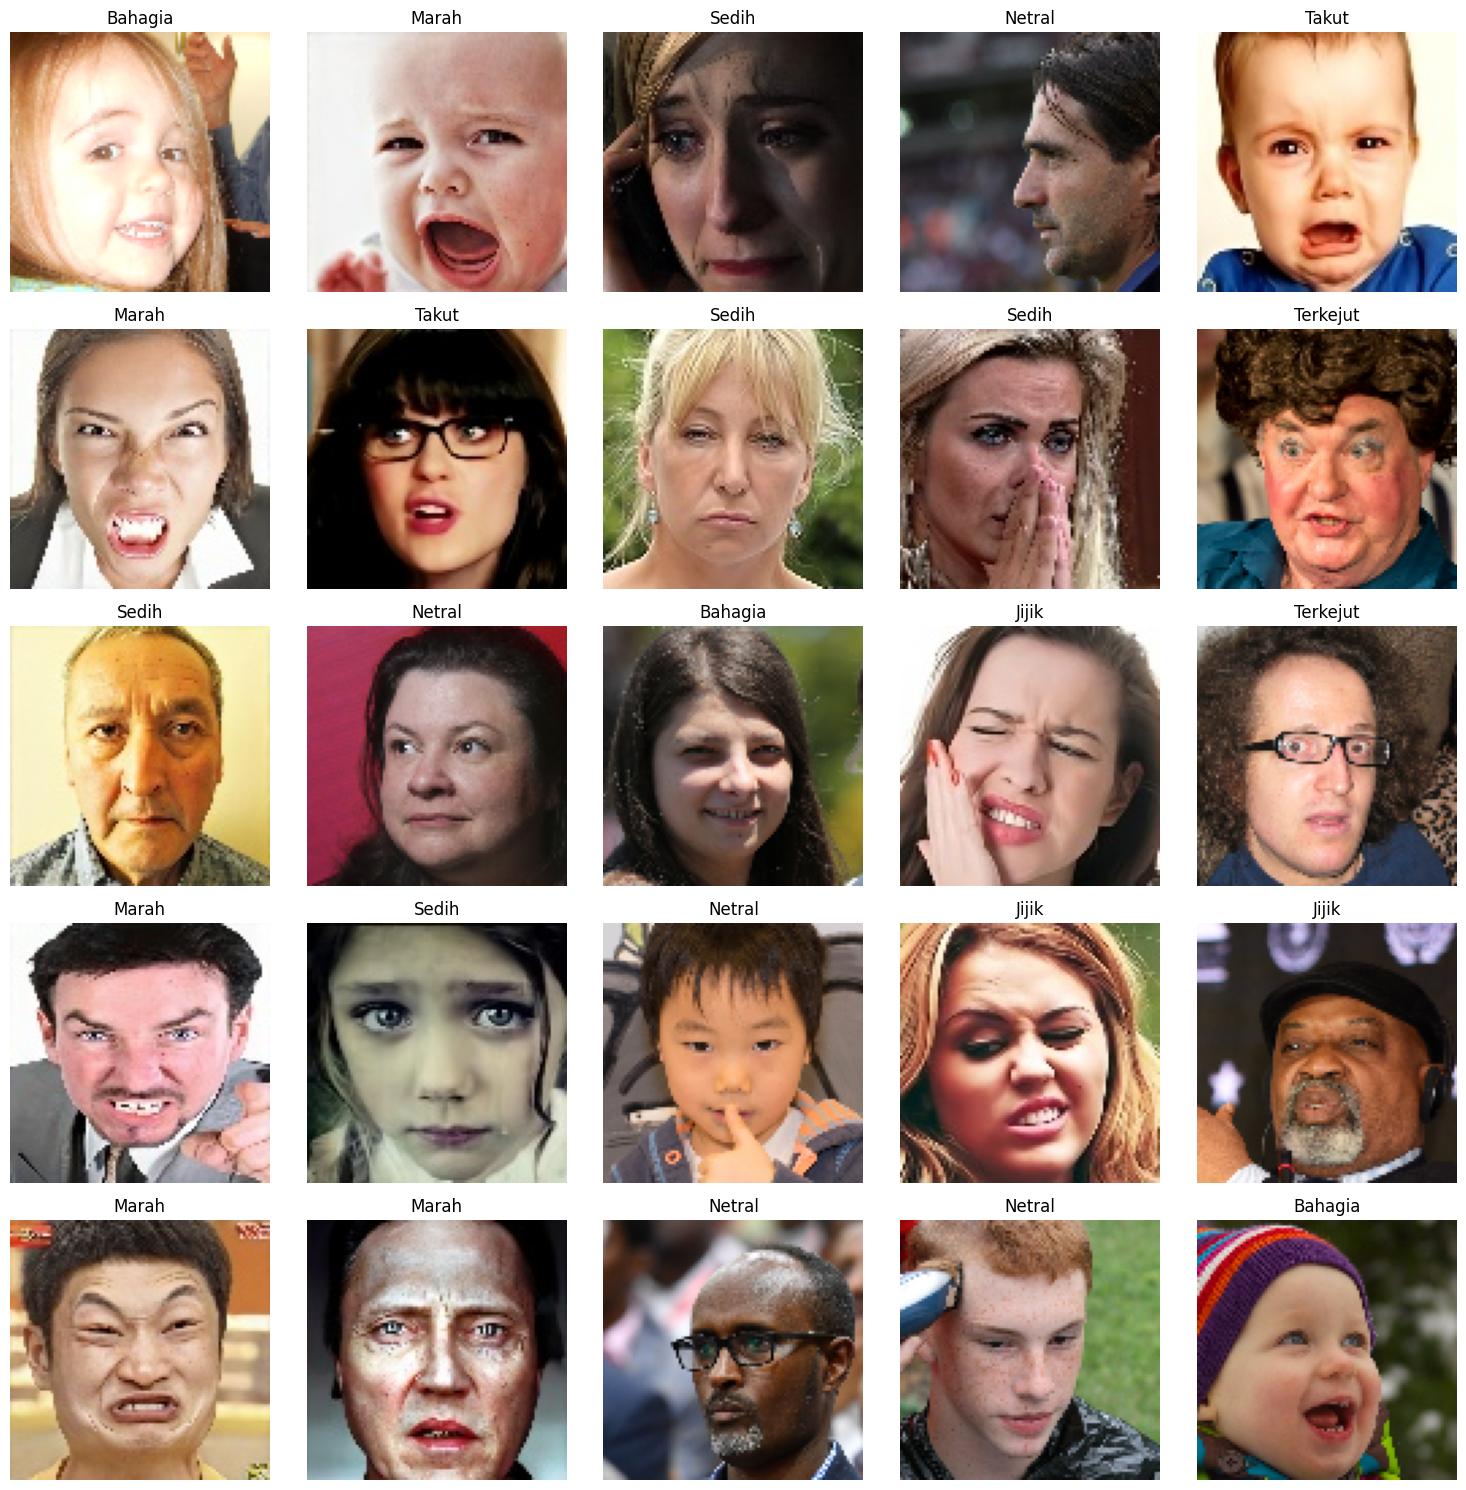

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

# Mendapatkan list dari folders di dalam path (ini adalah label kelas)
folders = [f for f in os.listdir(DATA_TRAIN) if os.path.isdir(os.path.join(DATA_TRAIN, f))]

# Mengumpulkan semua gambar beserta labelnya
all_images_with_labels = []
for folder in folders:
    folder_path = os.path.join(DATA_TRAIN, folder)
    if os.path.isdir(folder_path):
        image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        for image_file in image_files:
            all_images_with_labels.append((image_file, folder))  # Menyimpan tuple (path gambar, label)

# Memilih 25 gambar secara acak dari semua kelas
selected_images_with_labels = random.sample(all_images_with_labels, 25)

# Menentukan jumlah kolom dan baris untuk plotting
cols = 5
rows = 5

# Menyiapkan plot
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))

# Menampilkan gambar beserta labelnya
for i, (image_path, label) in enumerate(selected_images_with_labels):
    row = i // cols
    col = i % cols
    img = mpimg.imread(image_path)
    axes[row, col].imshow(img)
    axes[row, col].axis('off')
    axes[row, col].set_title(label)  # Menampilkan label (kelas) sebagai judul

plt.tight_layout()
plt.show()

 ### **3.2 Melakukan Perbaikan Orientasi Gambar**

In [22]:
# from PIL import Image, ExifTags
# import os
# import matplotlib.pyplot as plt

# def correct_orientation(img_path):
#     image = Image.open(img_path)
#     try:
#         for orientation in ExifTags.TAGS.keys():
#             if ExifTags.TAGS[orientation] == 'Orientation':
#                 break
#         exif = dict(image._getexif().items())
#         if exif[orientation] == 3:
#             image = image.rotate(180, expand=True)
#         elif exif[orientation] == 6:
#             image = image.rotate(270, expand=True)
#         elif exif[orientation] == 8:
#             image = image.rotate(90, expand=True)
#     except (AttributeError, KeyError, IndexError):
#         # cases: image don't have getexif
#         pass
#     return image

# def correct_dataset_orientation(dataset_path):
#     corrected_images = []  # List untuk menyimpan path gambar yang dikoreksi
#     for root, _, files in os.walk(dataset_path):
#         for file in files:
#             if file.lower().endswith(('png', 'jpg', 'jpeg', 'tiff', 'bmp', 'gif')):
#                 file_path = os.path.join(root, file)

#                 # Skip if the file name indicates it has already been corrected
#                 if "_corrected" in file:
#                     continue

#                 corrected_image = correct_orientation(file_path)

#                 # Check if the image was actually corrected (orientation changed)
#                 if corrected_image != Image.open(file_path):
#                     corrected_images.append(file_path)
#                     corrected_image.save(file_path)

#                     # Rename file to indicate it has been corrected
#                     new_file_path = os.path.join(root, file.replace('.', '_corrected.'))
#                     os.rename(file_path, new_file_path)

#     return corrected_images

# # Koreksi orientasi semua gambar dalam dataset dan simpan path gambar yang dikoreksi
# corrected_train_images = correct_dataset_orientation(DATA_TRAIN)
# corrected_val_images = correct_dataset_orientation(DATA_VAL)
# corrected_test_images = correct_dataset_orientation(DATA_TEST)

 ### **3.3 Menampilkan 50 Contoh Data (Radom Sample) Data Train - Setelah di Koreksi**

In [23]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# import os
# import random

# # Mendapatkan list dari folders di dalam path
# folders = [f for f in os.listdir(DATA_TRAIN) if os.path.isdir(os.path.join(DATA_TRAIN, f))]

# # Mengumpulkan semua gambar dari semua kelas
# all_images = []
# for folder in os.listdir(DATA_TRAIN):
#     folder_path = os.path.join(DATA_TRAIN, folder)
#     if os.path.isdir(folder_path):
#         image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
#         all_images.extend(image_files)

# # Memilih 50 gambar secara acak dari semua kelas
# selected_images = random.sample(all_images, 50)

# # Menentukan jumlah kolom dan baris untuk plotting
# cols = 10
# rows = 5

# # Menyiapkan plot
# fig, axes = plt.subplots(rows, cols, figsize=(15, 7))

# # Menampilkan gambar
# for i, image_path in enumerate(selected_images):
#     row = i // cols
#     col = i % cols
#     img = mpimg.imread(image_path)
#     axes[row, col].imshow(img)
#     axes[row, col].axis('off')

# plt.tight_layout()

 ### **3.3 Menampilkan 1 Contoh Data Dari Tiap Kelas pada Data Train**

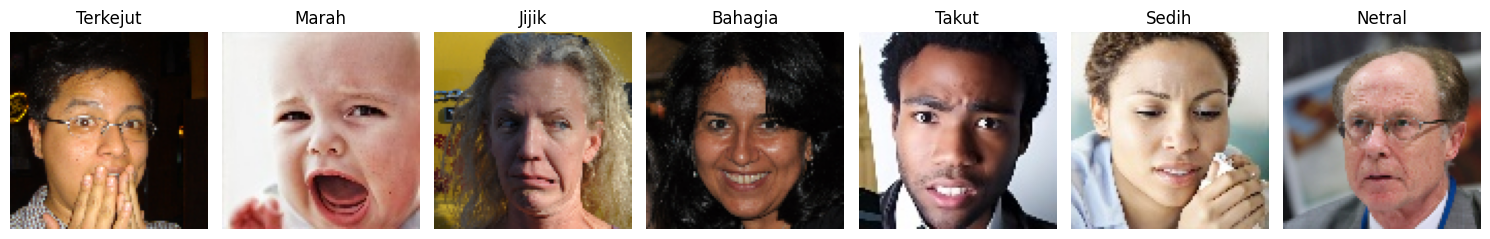

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

# Get the list of folders in the path
folders = [f for f in os.listdir(DATA_TRAIN) if os.path.isdir(os.path.join(DATA_TRAIN, f))]

# Display one image from each folder
fig, axes = plt.subplots(1, len(folders), figsize=(15, 5))
for i, folder in enumerate(folders):
    folder_path = os.path.join(DATA_TRAIN, folder)
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if image_files:
        image_path = os.path.join(folder_path, random.choice(image_files))
        img = mpimg.imread(image_path)
        axes[i].imshow(img)
        axes[i].set_title(folder)
        axes[i].axis('off')
plt.tight_layout()
plt.show()

## **4. Augmentasi Data**

 ### **4.1 Membuat Generator untuk Augmentasi Data Train, Validation dan Test**

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

SEED = 42
IMG_SIZE = (299,299)
BATCH_SIZE = 32

# inisialisasi generator data latih, data validasi, dan data uji dengan augmentasi data
TRAIN_DATAGEN = ImageDataGenerator(
    rescale=1./255,         # lakukan rescale agar piksel input citra berada pada rentang 0-1
    rotation_range=20,      # lakukan rotasi rentang 20 derajat
    zoom_range=0.2,         # lakukan zoom rentang 20%
    shear_range=0.2,        # lakukan shear rentang 20%
    width_shift_range=0.2,  # lakukan pergeseran lebar rentang 20%
    height_shift_range=0.2, # lakukan pergeseran tinggi rentang 20%
    fill_mode='nearest',    # metode pengisian piksel yang hilang
    horizontal_flip=True    # flipping horizontal
)

VAL_DATAGEN = ImageDataGenerator(
    rescale=1./255,         # lakukan rescale agar piksel input citra berada pada rentang 0-1
)

TEST_DATAGEN = ImageDataGenerator(
    rescale=1./255         # lakukan rescale agar piksel input citra berada pada rentang 0-1
)

# Generator untuk data latih
DATA_TRAIN_GENERATOR = TRAIN_DATAGEN.flow_from_directory(
    DATA_TRAIN,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    color_mode='rgb',
    class_mode='categorical',
    seed=SEED)

# Generator untuk data validasi
DATA_VAL_GENERATOR = VAL_DATAGEN.flow_from_directory(
    DATA_VAL,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    color_mode='rgb',
    class_mode='categorical',
    seed=SEED)

# Generator untuk data test
DATA_TEST_GENERATOR = TEST_DATAGEN.flow_from_directory(
    DATA_TEST,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False,
    color_mode='rgb',
    class_mode='categorical',
    seed=SEED)

Found 588 images belonging to 7 classes.
Found 168 images belonging to 7 classes.
Found 84 images belonging to 7 classes.


 ### **4.2 Melihat Shape Data**

In [26]:
import numpy as np

# Ambil satu batch dari data generator
x_train_batch, y_train_batch = next(DATA_TRAIN_GENERATOR)
x_val_batch, y_val_batch = next(DATA_VAL_GENERATOR)
x_test_batch, y_test_batch = next(DATA_TEST_GENERATOR)

# Cetak shape dari batch data
print("Shape of training data batch:")
print("X (images):", x_train_batch.shape)
print("Y (labels):", y_train_batch.shape)

print("\nShape of validation data batch:")
print("X (images):", x_val_batch.shape)
print("Y (labels):", y_val_batch.shape)

print("\nShape of test data batch:")
print("X (images):", x_test_batch.shape)
print("Y (labels):", y_test_batch.shape)

Shape of training data batch:
X (images): (32, 299, 299, 3)
Y (labels): (32, 7)

Shape of validation data batch:
X (images): (32, 299, 299, 3)
Y (labels): (32, 7)

Shape of test data batch:
X (images): (32, 299, 299, 3)
Y (labels): (32, 7)


 ### **4.3 Melihat Data Hasil Augmentasi**

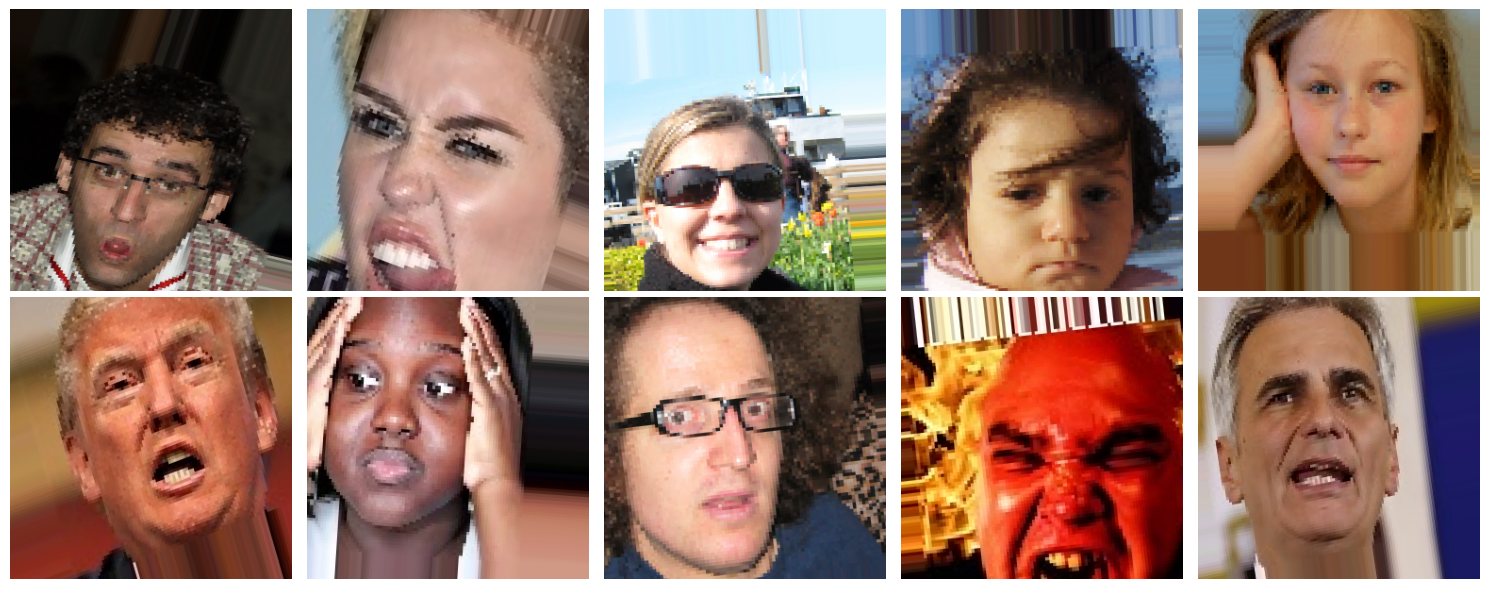

In [27]:
# Ambil satu batch dari data generator latih
x_train_batch, y_train_batch = next(DATA_TRAIN_GENERATOR)

augmented_images = [x_train_batch[i] for i in range(10)]

fig, axes = plt.subplots(2, 5, figsize=(15,6))
axes = axes.flatten()
for img, ax in zip(augmented_images, axes):
    ax.imshow(img)
    ax.axis('off')
plt.tight_layout()
plt.show()

## **5. Mendefinisikan Model**

 ### **5.1 Import Library yang Diperlukan**

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.applications import Xception

from tensorflow.keras.callbacks import ModelCheckpoint

## **5.2 Mendefinisikan dan Melatih Model**

 ### **5.2.1 Menetapkan Hyperparameter yang Digunakan, Definisikan Pretrained Model**

In [29]:
# Mendefinisikan variabel Hyperparameter untuk proses pelatihan model
INPUT_SIZE = (299, 299, 3)
EPOCHS = 10
LEARNING_RATE = 0.0001

# Meload pre_trained model Xception dari Keras
PRE_MODEL = Xception(weights='imagenet', include_top=False, input_shape=INPUT_SIZE)

# Membuka seluruh lapisan-lapisan pretrained dari Xception
PRE_MODEL.trainable = False

PRE_MODEL.summary()

Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 299, 299, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 149, 149, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 149, 149, 32)   │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 149, 149, 32)   │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 147, 147, 64)   │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 147, 147, 64)   │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 147, 147, 64)   │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 147, 147, 128)  │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 147, 147, 128)  │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 147, 147, 128)  │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 147, 147, 128)  │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 147, 147, 128)  │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 74, 74, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 74, 74, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├──────────────────────

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,861,480 (79.58 MB)

 ### **5.2.2 Menambahkan Layer pada Model**

In [30]:
INPUTS = PRE_MODEL.input

# Menambahkan layer baru di atas base model
ADD_LAYER = PRE_MODEL.output
ADD_LAYER = GlobalAveragePooling2D()(ADD_LAYER)
ADD_LAYER = Dropout(0.5)(ADD_LAYER)

predictions = Dense(7, activation='softmax')(ADD_LAYER)  # 7 adalah jumlah kelas

# Membuat model akhir
MODEL = Model(inputs = INPUTS, outputs = predictions, name="Xception")

# Menampilkan ringkasan model
MODEL.summary()

Model: "Xception"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 299, 299, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 149, 149, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 149, 149, 32)   │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 149, 149, 32)   │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 147, 147, 64)   │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 147, 147, 64)   │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 147, 147, 64)   │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 147, 147, 128)  │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 147, 147, 128)  │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 147, 147, 128)  │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 147, 147, 128)  │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 147, 147, 128)  │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 74, 74, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 74, 74, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├──────────────────────

 Total params: 20,875,823 (79.63 MB)

 Trainable params: 14,343 (56.03 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

 ### **5.2.3 Melatih Model**

In [31]:
# Mendefinisikan lokasi penyimpanan model
CODE_PATH = 'gdrive/My Drive/Hasil Penelitian/Code Penelitian/'
CHECKPOINT_FILEPATH = os.path.join(CODE_PATH, 'justifikasi_xception.keras')

# Simpan model yang mendapatkan akurasi validasi tertinggi
MODEL_CHECKPOINT_CALLBACK = ModelCheckpoint(
    filepath=CHECKPOINT_FILEPATH,
    save_weights_only=False,
    monitor='val_loss',
    verbose=1,
    mode='auto',
    save_best_only=True)

# Konfigurasi Model
OPTIMIZER = Adam(learning_rate=LEARNING_RATE)
MODEL.compile(
    optimizer=OPTIMIZER,
    loss='categorical_crossentropy',
    loss_weights=1.0,
    metrics=['accuracy'])

# Melatih model
history_lr_1 = MODEL.fit(DATA_TRAIN_GENERATOR,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[MODEL_CHECKPOINT_CALLBACK],
    verbose=1,
    validation_data=DATA_VAL_GENERATOR,
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.1522 - loss: 2.0145
Epoch 1: val_loss improved from inf to 1.99033, saving model to gdrive/My Drive/Hasil Penelitian/Code Penelitian/justifikasi_xception.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 293s 10s/step - accuracy: 0.1521 - loss: 2.0146 - val_accuracy: 0.1488 - val_loss: 1.9903
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 759ms/step - accuracy: 0.1186 - loss: 2.0040
Epoch 2: val_loss improved from 1.99033 to 1.96501, saving model to gdrive/My Drive/Hasil Penelitian/Code Penelitian/justifikasi_xception.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 55s 868ms/step - accuracy: 0.1192 - loss: 2.0037 - val_accuracy: 0.1964 - val_loss: 1.9650
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 605ms/step - accuracy: 0.1541 - loss: 1.9669
Epoch 3: val_loss improved from 1.96501 to 1.94644, saving model to gdrive/My Drive/Hasil Penelitian/Code Penelitian/justifikasi_xception.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 18s 716ms/step - accuracy: 0.1543 - loss: 1.9672 - val_accuracy: 0

In [32]:
# Membekukan semua kecuali 25 lapisan terakhir [belum run]
for layer in MODEL.layers[:-25]:  # Freeze semua lapisan kecuali 25 terakhir
    layer.trainable = True

# Mendefinisikan lokasi penyimpanan model
CODE_PATH = 'gdrive/My Drive/Hasil Penelitian/Code Penelitian/'
CHECKPOINT_FILEPATH = os.path.join(CODE_PATH, 'justifikasi_xception.keras')

# Simpan model yang mendapatkan akurasi validasi tertinggi
MODEL_CHECKPOINT_CALLBACK = ModelCheckpoint(
    filepath=CHECKPOINT_FILEPATH,
    save_weights_only=False,
    monitor='val_loss',
    verbose=1,
    mode='auto',
    save_best_only=True)

# Konfigurasi Model
OPTIMIZER = Adam(learning_rate=LEARNING_RATE)
MODEL.compile(
    optimizer=OPTIMIZER,
    loss='categorical_crossentropy',
    loss_weights=1.0,
    metrics=['accuracy'])

# Melatih model
history_fine = MODEL.fit(DATA_TRAIN_GENERATOR,
    batch_size=BATCH_SIZE,
    epochs=15,
    callbacks=[MODEL_CHECKPOINT_CALLBACK],
    verbose=1,
    validation_data=DATA_VAL_GENERATOR,
)

Epoch 1/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2122 - loss: 1.9024
Epoch 1: val_loss improved from inf to 1.82546, saving model to gdrive/My Drive/Hasil Penelitian/Code Penelitian/justifikasi_xception.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 109s 3s/step - accuracy: 0.2119 - loss: 1.9023 - val_accuracy: 0.2976 - val_loss: 1.8255
Epoch 2/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 918ms/step - accuracy: 0.2918 - loss: 1.8039
Epoch 2: val_loss improved from 1.82546 to 1.77757, saving model to gdrive/My Drive/Hasil Penelitian/Code Penelitian/justifikasi_xception.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.2918 - loss: 1.8033 - val_accuracy: 0.3393 - val_loss: 1.7776
Epoch 3/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 931ms/step - accuracy: 0.3223 - loss: 1.7033
Epoch 3: val_loss improved from 1.77757 to 1.70745, saving model to gdrive/My Drive/Hasil Penelitian/Code Penelitian/justifikasi_xception.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.3220 - loss: 1.7025 - val_accurac

In [33]:
# Membekukan semua kecuali 25 lapisan terakhir
for layer in MODEL.layers[:-50]:  # Freeze semua lapisan kecuali 25 terakhir
    layer.trainable = True

# Mendefinisikan lokasi penyimpanan model
CODE_PATH = 'gdrive/My Drive/Hasil Penelitian/Code Penelitian/'
CHECKPOINT_FILEPATH = os.path.join(CODE_PATH, 'justifikasi_xception.keras')

# Simpan model yang mendapatkan akurasi validasi tertinggi
MODEL_CHECKPOINT_CALLBACK = ModelCheckpoint(
    filepath=CHECKPOINT_FILEPATH,
    save_weights_only=False,
    monitor='val_loss',
    verbose=1,
    mode='auto',
    save_best_only=True)

# Konfigurasi Model
OPTIMIZER = Adam(learning_rate=LEARNING_RATE)
MODEL.compile(
    optimizer=OPTIMIZER,
    loss='categorical_crossentropy',
    loss_weights=1.0,
    metrics=['accuracy'])

# Melatih model
history_fine_2 = MODEL.fit(DATA_TRAIN_GENERATOR,
    batch_size=BATCH_SIZE,
    epochs=20,
    callbacks=[MODEL_CHECKPOINT_CALLBACK],
    verbose=1,
    validation_data=DATA_VAL_GENERATOR,
)

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9388 - loss: 0.2424
Epoch 1: val_loss improved from inf to 1.20164, saving model to gdrive/My Drive/Hasil Penelitian/Code Penelitian/justifikasi_xception.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.9384 - loss: 0.2429 - val_accuracy: 0.5833 - val_loss: 1.2016
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 902ms/step - accuracy: 0.9361 - loss: 0.2395
Epoch 2: val_loss did not improve from 1.20164
19/19 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9358 - loss: 0.2392 - val_accuracy: 0.5536 - val_loss: 1.3097
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 941ms/step - accuracy: 0.9358 - loss: 0.1816
Epoch 3: val_loss did not improve from 1.20164
19/19 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9357 - loss: 0.1832 - val_accuracy: 0.6012 - val_loss: 1.3468
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 908ms/step - accuracy: 0.9413 - loss: 0.1703
Epoch 4: val_loss did not improve from 1.20164
19/19 ━━━━━━━━━━━━━━━━━━━━ 24s 98

In [34]:
# Membuka seluruh lapisan-lapisan pretrained dari Xception
MODEL.trainable = True

# Mendefinisikan lokasi penyimpanan model
CODE_PATH = 'gdrive/My Drive/Hasil Penelitian/Code Penelitian/'
CHECKPOINT_FILEPATH = os.path.join(CODE_PATH, 'justifikasi_xception.keras')

# Simpan model yang mendapatkan akurasi validasi tertinggi
MODEL_CHECKPOINT_CALLBACK = ModelCheckpoint(
    filepath=CHECKPOINT_FILEPATH,
    save_weights_only=False,
    monitor='val_loss',
    verbose=1,
    mode='auto',
    save_best_only=True)

# Konfigurasi Model
OPTIMIZER = Adam(learning_rate=LEARNING_RATE)
MODEL.compile(
    optimizer=OPTIMIZER,
    loss='categorical_crossentropy',
    loss_weights=1.0,
    metrics=['accuracy'])

# Melatih model
history_fine_2 = MODEL.fit(DATA_TRAIN_GENERATOR,
    batch_size=BATCH_SIZE,
    epochs=20,
    callbacks=[MODEL_CHECKPOINT_CALLBACK],
    verbose=1,
    validation_data=DATA_VAL_GENERATOR,
)

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9912 - loss: 0.0324
Epoch 1: val_loss improved from inf to 2.07535, saving model to gdrive/My Drive/Hasil Penelitian/Code Penelitian/justifikasi_xception.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.9913 - loss: 0.0323 - val_accuracy: 0.5774 - val_loss: 2.0754
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 925ms/step - accuracy: 0.9787 - loss: 0.0638
Epoch 2: val_loss did not improve from 2.07535
19/19 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9785 - loss: 0.0640 - val_accuracy: 0.5655 - val_loss: 2.1143
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 900ms/step - accuracy: 0.9898 - loss: 0.0442
Epoch 3: val_loss did not improve from 2.07535
19/19 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9897 - loss: 0.0443 - val_accuracy: 0.5952 - val_loss: 2.1321
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 930ms/step - accuracy: 0.9977 - loss: 0.0166
Epoch 4: val_loss did not improve from 2.07535
19/19 ━━━━━━━━━━━━━━━━━━━━ 39s 1s

## **6. Evaluasi Model**

In [35]:
from tensorflow.keras.models import load_model

# load hasil pelatihan untuk di uji
trained_model = load_model(CHECKPOINT_FILEPATH)

# pengujian dengan data uji
trained_model.evaluate(DATA_TEST_GENERATOR, verbose=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 26s 11s/step - accuracy: 0.5454 - loss: 2.2458


[2.0567142963409424, 0.5595238208770752]

  0%|          | 0/3 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━

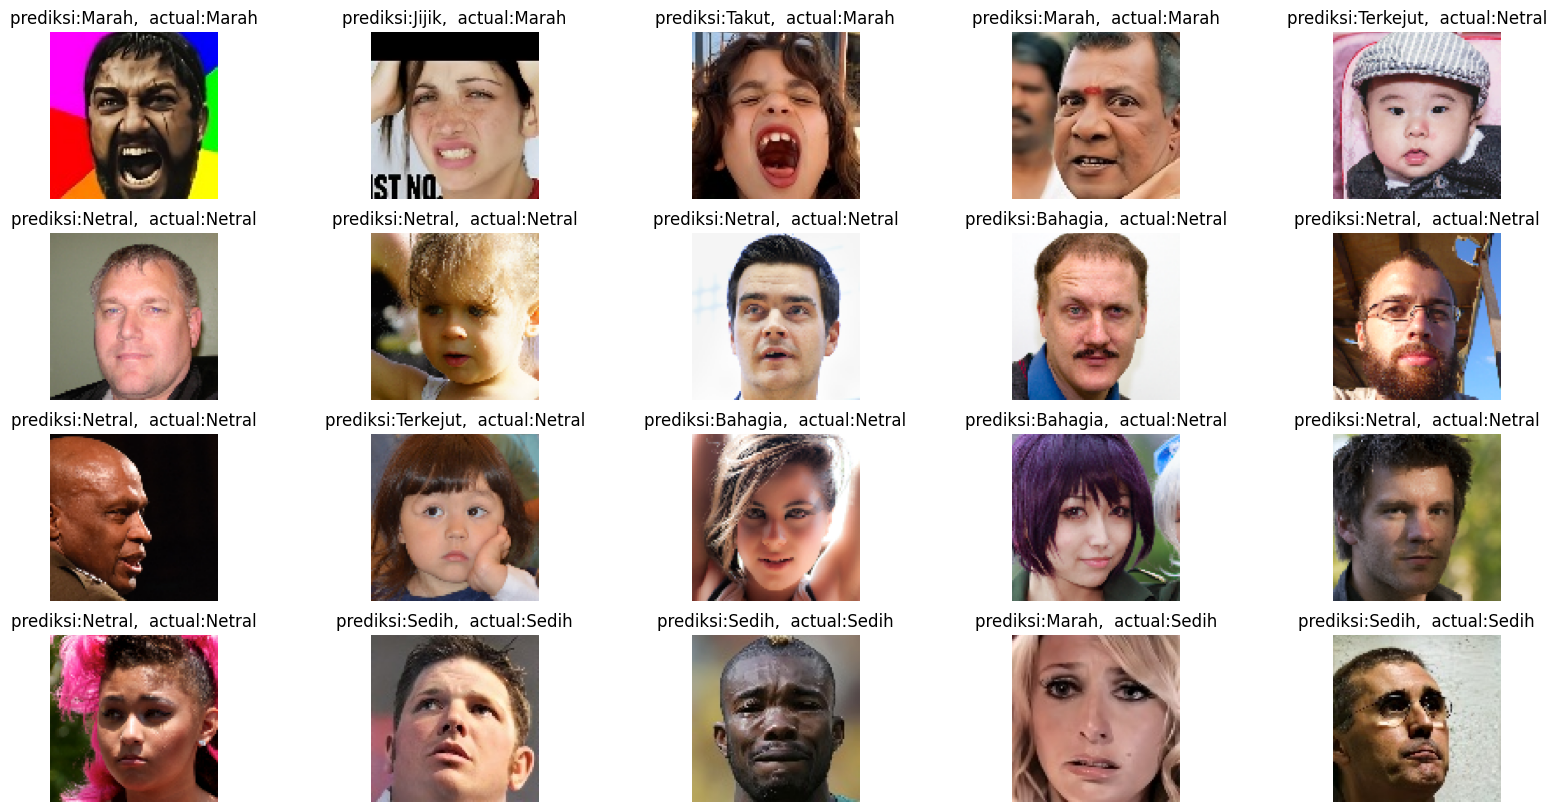

In [36]:
from tqdm.notebook import tqdm_notebook

# tampilkan misalnya 20 citra pada dataset
nimages = 20
ncols_plot = 5
nrows_plot = nimages//ncols_plot

class_name = {v: k for k, v in DATA_TEST_GENERATOR.class_indices.items()}

y_predict = []
y_actual = []
count_imgs = 0
plot_frame = plt.figure(figsize=(20,10))

# one-by-one prediction
for i in tqdm_notebook(range(len(DATA_TEST_GENERATOR))):
    imgs, labels = next(DATA_TEST_GENERATOR)
    labels = np.array(labels, dtype=np.uint8)
    for j in range(len(imgs)):
        X_batch = np.expand_dims(imgs[j], axis=0)
        prediction_scores = trained_model.predict(X_batch)
        score = np.argmax(prediction_scores)
        y_predict.append(score)
        y_actual.append(labels[j])

        # tampilkan 20 hasil pengujian
        if (count_imgs < nimages):
            ax = plot_frame.add_subplot(nrows_plot, ncols_plot, count_imgs+1)
            ax.axis('off')
            ax.set_title("prediksi:" + class_name[score] + \
                        ",  actual:" + class_name[np.argmax(labels[j])])
            plt.imshow(np.uint8(imgs[j]*255))
        count_imgs += 1

y_predict = np.array(y_predict)
y_actual = np.array(y_actual)

Laporan Klasifikasi Data Uji:
              precision    recall  f1-score   support

           0       0.58      0.58      0.58        12
           1       0.71      0.42      0.53        12
           2       0.54      0.58      0.56        12
           3       0.54      0.58      0.56        12
           4       0.50      0.58      0.54        12
           5       0.50      0.50      0.50        12
           6       0.62      0.67      0.64        12

    accuracy                           0.56        84
   macro avg       0.57      0.56      0.56        84
weighted avg       0.57      0.56      0.56        84

Confusion Matrix:
[[7 0 0 3 0 0 2]
 [1 5 3 0 0 2 1]
 [0 1 7 0 3 1 0]
 [3 0 0 7 0 0 2]
 [0 0 2 0 7 3 0]
 [0 1 1 0 4 6 0]
 [1 0 0 3 0 0 8]]


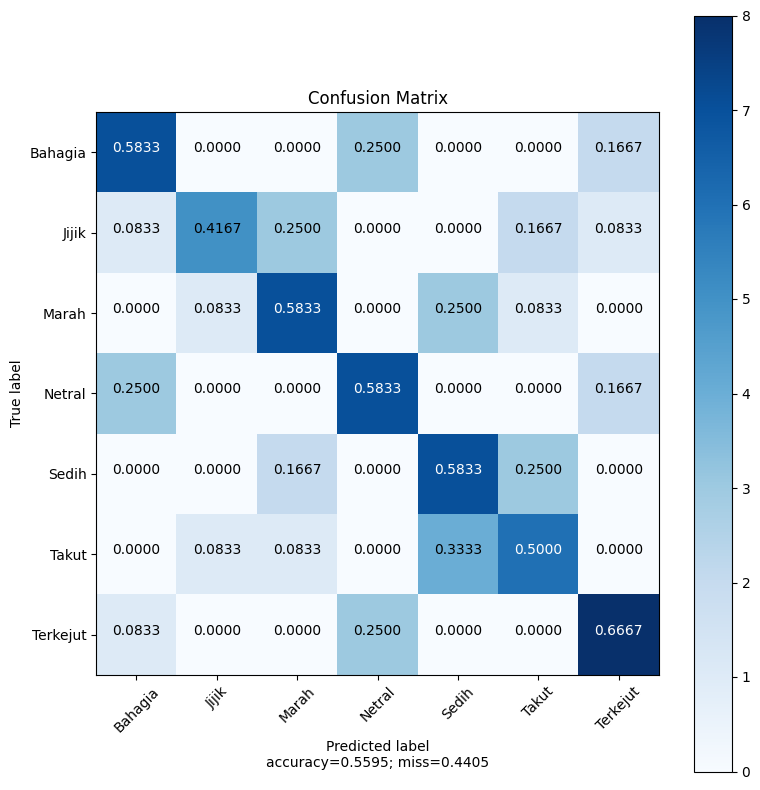

In [37]:
import itertools
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Jika y_actual adalah one-hot encoded, ubah menjadi label kelas
if len(y_actual.shape) > 1 and y_actual.shape[1] > 1:
    y_actual = np.argmax(y_actual, axis=1)

# cetak laporan hasil klasifikasi data uji
print('Laporan Klasifikasi Data Uji:')
print(classification_report(y_actual, y_predict))

# hitung confusion matrixnya
conf_mat_result = confusion_matrix(y_actual, y_predict)

# cetak confusion matrix
print('Confusion Matrix:')
print(conf_mat_result)

accuracy = np.trace(conf_mat_result) / np.sum(conf_mat_result).astype('float')
misclass = 1 - accuracy

# masukkan nama kelas di dataset
target_names = [class_name[i] for i in range(len(class_name))]
plt.figure(figsize=(8, 8))
cmap = plt.get_cmap('Blues')

plt.imshow(conf_mat_result, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)

cm = conf_mat_result.astype('float') / conf_mat_result.sum(axis=1)[:, np.newaxis]
thresh = cm.max() / 1.5
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, "{:0.4f}".format(cm[i, j]),
             horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label\naccuracy={:0.4f}; miss={:0.4f}'.format(accuracy, misclass))
plt.show()